In [1]:
# importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# loading the dataset
data=pd.read_csv(r"C:\Users\HP\Downloads\Bengaluru_House_Data.csv")

In [3]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# making copy of data .
data_copy= data.copy()

In [5]:
data_copy.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2198,Built-up Area,Ready To Move,Hulimavu,4 Bedroom,NaN,1200,4.0,0.0,75.00
8713,Super built-up Area,18-Jan,Hosa Road,2 BHK,SRrnauv,840,2.0,1.0,28.00
12732,Built-up Area,18-Dec,Electronic City Phase II,2 BHK,Sryalan,1065,2.0,1.0,30.76
11218,Super built-up Area,Ready To Move,Puttanahalli,4 BHK,NaN,1530,3.0,3.0,87.00
4716,Super built-up Area,Ready To Move,Kundalahalli Colony,3 BHK,Goourta,2600,3.0,2.0,140.00
12479,Built-up Area,Ready To Move,Sarjapur Road,3 BHK,Adeatlm,1857,4.0,3.0,155.00
5364,Built-up Area,Ready To Move,"Ananthanagar Phase 1,Electronic City , phase 2",2 BHK,NaN,1016,2.0,1.0,45.90
9597,Plot Area,Ready To Move,Kamakshipalya,1 Bedroom,NaN,450,1.0,0.0,30.00
4674,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Suntsan,1620,2.0,2.0,85.00
4786,Super built-up Area,Ready To Move,Electronic City,2 BHK,Itelaa,660,1.0,1.0,15.00


In [6]:
# Checking the shape of data
data_copy.shape

(13320, 9)

* We have 13320 rows and 9 columns.

In [7]:
# checking the info
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


* There are 3 columns based on float datatype and 6 columns based on object datatype.

In [8]:
# checking for null values 
data_copy.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

* We have null values in our dataset.Which have to removed or replaced by its mean or mod values.

In [9]:
data_copy.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

* List of a columns

In [10]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


# cleaning the columns one by one 

### (1) for columns area_type

In [11]:
data_copy["area_type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: area_type
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


* The data stored in a area_type column is of object datatype.

In [12]:
# checking for unique values.
data_copy["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [13]:
data_copy["area_type"].nunique()

4

* There are total 4 unique values present in area_type column.

In [14]:
# counting the values of area_type column
data_copy["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

* There are 8790 counts for Super built-up Area.
* There are 2418 counts for Built-up Area.
* There are 2025 counts for Plot Area.
* There are 87 counts for Carpet Area.

### (2).availability column


In [15]:
# checking the info
data_copy["availability"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: availability
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


* The data in availability column is of object datatype

In [16]:
# checking the unique values 
data_copy["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [17]:
data_copy["availability"].nunique()

81

* There are total 81 unique values in it.

In [18]:
# checking for data which are ready to move
data_copy[data_copy["availability"]=="Ready To Move"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.0
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0


* There are total 10581 houses in bangaluru which are ready to move.


In [19]:
# checking  for Immediate Possession 
data_copy[data_copy["availability"]=='Immediate Possession']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


* There are 16 houses which are under immediate possession.

In [20]:
# checking for null value
data_copy["availability"].isnull().sum()

0

*There is no null values present in it.

### (3) For location column

In [21]:
# checking it info
data_copy["location"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: location
Non-Null Count  Dtype 
--------------  ----- 
13319 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


* The data present in this columnnis of object datatype.

In [22]:
# checking fo unique values
data_copy["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
data_copy["location"].nunique()

1305

* There are 1305 unique values present in it.

In [24]:
# checking for the null values.
data_copy["location"].isnull().sum()

1

* There is 1 null value present it.

In [25]:
# As the data is of object datatype here so we are replacing the null value with its mode value .
mode=data_copy["location"].mode()[0]

In [26]:
mode

'Whitefield'

In [27]:
# filling the null value with its mode .
data_copy["location"].fillna('Whitefield',inplace=True)


* The null value is replace with its mode value.

In [28]:
# cross checking for the null value 
data_copy["location"].isnull().sum()

0

* successfully we have replaced the null value with mode value,i.e., 'Whitefield'.

# PART-2

### (4) for column size

In [29]:
# checking the info
data_copy["size"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: size
Non-Null Count  Dtype 
--------------  ----- 
13304 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


* The column contains the object data type of values in it.

In [30]:
# checking the unique values in it.
data_copy["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [31]:
data_copy["size"].nunique()

31

* There are 31 unique values present in it including the null values too.

In [32]:
# checking for the null values if present.
data_copy["size"].isnull().sum()

16

* There are 16 null values present in it.


In [33]:
data_copy["size"].describe()

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

In [34]:
# replacing the nan values with mode value.
m=data_copy["size"].mode()[0]

In [35]:
m

'2 BHK'

In [36]:
# filling the null values.
data_copy['size'].fillna(m,inplace=True)

In [37]:
# rechecking for null value if any.
data_copy["size"].isnull().sum()

0

* We have replaced the null values with its mode values.

In [38]:
# converting this column into integer data type.

# removed the unwanted string value from the column.
data_copy["size"]=data_copy["size"].str.replace("BHK","").str.replace("Bedroom","").str.replace("RK","")

In [39]:
# converting it into integer
data_copy["size"]=data_copy["size"].astype(int)

In [40]:
# checking the sample
data_copy

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.0,488.00


In [41]:
# checking for the value count
data_copy["size"].value_counts()

size
2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [42]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  int32  
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), int32(1), object(5)
memory usage: 884.7+ KB


* Data of size column is successfully converted into integer data type.

### (5)for society column.

In [43]:
# checking info
data_copy["society"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: society
Non-Null Count  Dtype 
--------------  ----- 
7818 non-null   object
dtypes: object(1)
memory usage: 104.2+ KB


* we have object data in it.

In [44]:
# checking for null value
data_copy["society"].isnull().sum()

5502

* As we have large number of data in null values so its better to drop this column from the dataset.

In [45]:
# dropping the column
data_copy.drop(columns="society",axis=1,inplace=True)

In [46]:
#checking the dataset
data_copy.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


* Successfully dropped the society column from the dataset.

### (6) for column total_sqft


In [47]:
# info
data_copy["total_sqft"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


* The data of this column is of  object data type.

In [48]:
# checking for null values present in it.
data_copy["total_sqft"].isnull().sum()

0

* There is no null values present in it.

In [49]:
# checking for unique values 
data_copy["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [50]:
data_copy["total_sqft"].nunique()

2117

In [51]:
data_copy["total_sqft"].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [52]:
data_copy[data_copy["total_sqft"]=='1133 - 1384']

,area_type,availability,location,size,total_sqft,bath,balcony,price
13265,Super built-up Area,20-Sep,Hoodi,2,1133 - 1384,2.0,0.0,59.135


In [53]:
data_copy[data_copy["total_sqft"].str.contains("-")]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2,1133 - 1384,2.0,0.0,59.135


* There are 201 rows which are having the area of sqft in range.

In [54]:
# converting the range sqft into numeric value by taking its average.
# creating a user-defined function for this.
def cleaned_total_sqft(total_sqft):
    
    #handling the range
    if '-' in total_sqft:
        split_values=total_sqft.split('-')
        
        
        return (float(split_values[0]) +float( split_values[1]))/2

    try:
        # Convert non-numeric values to NaN
        return float(total_sqft)
    except:
        # Handle unusual formats
        return np.nan  # Convert to NaN for further cleaning

# using these method in total_Sqft column
data_copy["total_sqft"]=data_copy["total_sqft"].apply(cleaned_total_sqft)

In [55]:
data_copy["total_sqft"]

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

In [56]:
# checking for null values
data_copy['total_sqft'].isnull().sum()

46

* We have 46 null values in our total_sqft column.

In [57]:
# checking the summary of total_sqft column
data_copy["total_sqft"].describe()

count    13274.000000
mean      1559.626694
std       1238.405258
min          1.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [58]:
mean_total_sqft=data_copy["total_sqft"].mean()

In [59]:
mean_total_sqft

1559.6266939129125

In [60]:
# using mean value to fill the nan values 
data_copy["total_sqft"].fillna(mean_total_sqft,inplace=True)

* Null values are filled with its mean value.

### (7). for bath column

In [61]:
data_copy["bath"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: bath
Non-Null Count  Dtype  
--------------  -----  
13247 non-null  float64
dtypes: float64(1)
memory usage: 104.2 KB


In [62]:
# checking for null values
data_copy['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [63]:
data_copy["bath"].nunique()

19

* There are 19 unique values .

In [64]:
# checking for null values
data_copy["bath"].isnull().sum()

73

In [65]:
data_copy["bath"].describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [66]:
bath_mean=data_copy["bath"].mean()

In [67]:
bath_mean

2.6926096474673513

In [68]:
# imputing the null values with mean value.
data_copy["bath"].fillna(bath_mean,inplace=True)

* Imputed the null values with its mean value.

### (8) for balcony column


In [69]:
# checking the info
data_copy["balcony"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: balcony
Non-Null Count  Dtype  
--------------  -----  
12711 non-null  float64
dtypes: float64(1)
memory usage: 104.2 KB


In [70]:
# checking for unique values
data_copy["balcony"].unique()

array([ 1.,  3., nan,  2.,  0.])

In [71]:
# checking for null values
data_copy["balcony"].isnull().sum()

609

In [72]:
# dropping the null  values from the balcony column
a="balcony"
data_copy.dropna(subset=[a],inplace=True)

In [73]:
data_copy["balcony"].isnull().sum()

0

In [74]:
# value counting
data_copy["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

* There maximum numbers of houses having 2 balcony in it.


In [75]:
data_copy['balcony']

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13314    3.0
13315    0.0
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 12711, dtype: float64

### (9) for price column

In [76]:
data_copy["price"].info()

<class 'pandas.core.series.Series'>
Index: 12711 entries, 0 to 13319
Series name: price
Non-Null Count  Dtype  
--------------  -----  
12711 non-null  float64
dtypes: float64(1)
memory usage: 198.6 KB


In [77]:
# checking null value
data_copy["price"].isnull().sum()

0

* There are no null values present in it.


In [78]:
# checking for high price house
data_copy[data_copy["price"]==data_copy["price"].max()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
11080,Super built-up Area,18-Jan,Ashok Nagar,4,8321.0,5.0,2.0,2912.0


In [79]:
# checking for low price house
data_copy[data_copy["price"]==data_copy["price"].min()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1,284.0,1.0,1.0,8.0


# Checking for outlier

In [80]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12711 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12711 non-null  object 
 1   availability  12711 non-null  object 
 2   location      12711 non-null  object 
 3   size          12711 non-null  int32  
 4   total_sqft    12711 non-null  float64
 5   bath          12711 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         12711 non-null  float64
dtypes: float64(4), int32(1), object(3)
memory usage: 844.1+ KB


In [81]:
# making a group of numeric data
numeric=[ feature for feature in data_copy.columns if data_copy[feature].dtype !='O' ]

In [82]:
numeric

['size', 'total_sqft', 'bath', 'balcony', 'price']

### (1)for size column

<Axes: ylabel='size'>

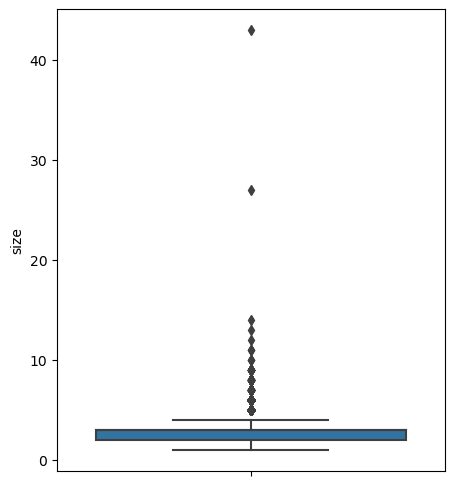

In [83]:
plt.figure(figsize=(5,6))
sb.boxplot(y="size",data=data_copy)

### (2) for total_sqft colum

<Axes: ylabel='total_sqft'>

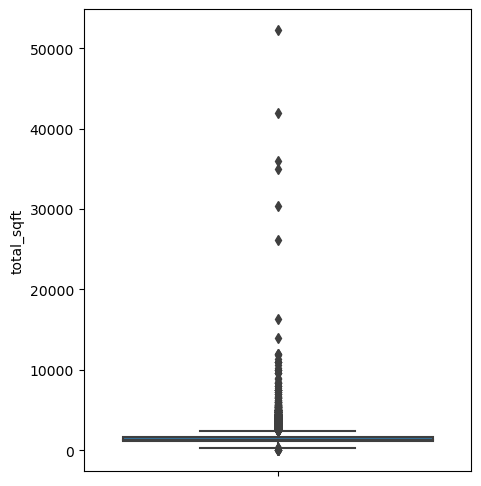

In [84]:
plt.figure(figsize=(5,6))
sb.boxplot(y="total_sqft",data=data_copy)

### (3).For bath column

<Axes: ylabel='bath'>

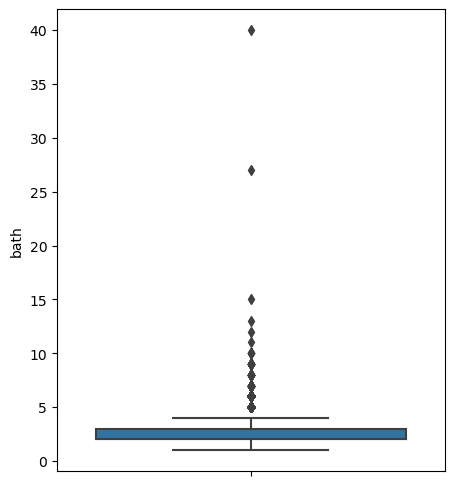

In [85]:
plt.figure(figsize=(5,6))
sb.boxplot(y="bath",data=data_copy)

### (4).For balcony column

<Axes: ylabel='balcony'>

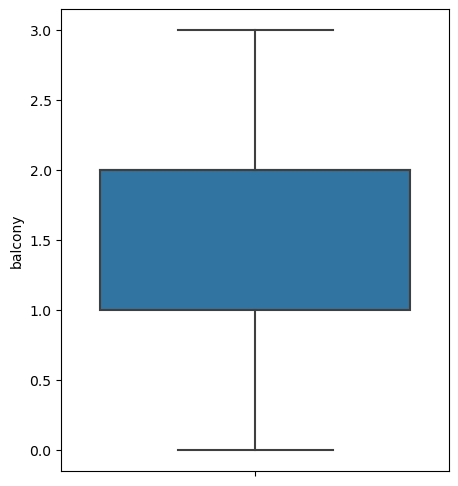

In [86]:
plt.figure(figsize=(5,6))
sb.boxplot(y="balcony",data=data_copy)

* There is no outlier in our balcony column

### (5).For price column

<Axes: ylabel='price'>

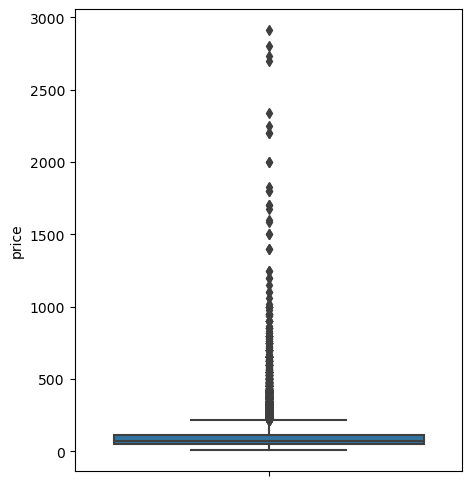

In [87]:
plt.figure(figsize=(5,6))
sb.boxplot(y="price",data=data_copy)

In [104]:
# Now treating the outliers.
# using the IQR concept
def outlier(dataset):
    
    print(dataset.head(2))
    print()
    
    a=input("Select the column from the dataset.\n")
    print()
    Q1= dataset[a].quantile(0.25)
    print(f"Q1 = {Q1}")
    print()
    Q3=dataset[a].quantile(0.75)
    print(f'Q3 = {Q3}')
    print()
    
    # calculating the range of inter quartile
    IQR = Q3 - Q1
    print(f"IQR = {IQR}")
    
    print()
    
    # calculating the upperboundary
    upperference = Q3 + 1.5*(IQR)
    print(f"upperference = {upperference}")
    print()
    
    #calculating the lowerboundary
    lowerference = Q1 - 1.5*(IQR)
    print(f"lowerference = {lowerference}")
    print()
    
    # removing the outlier
    dataset=dataset[(dataset[a]>=lowerference) &(dataset[a]<=upperference)]
    
    # plotting the boxplot after treating the outliers
    plt.title("Without outlier")
    sb.boxplot(y=dataset[a],data=dataset)
    return

              area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II     2   
1            Plot  Area  Ready To Move          Chikka Tirupathi     4   

   total_sqft  bath  balcony   price  
0      1056.0   2.0      1.0   39.07  
1      2600.0   5.0      3.0  120.00  

Select the column from the dataset.
size

Q1 = 2.0

Q3 = 3.0

IQR = 1.0

upperference = 4.5

lowerference = 0.5



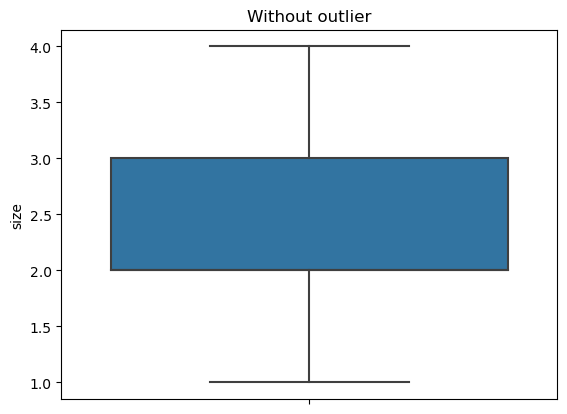

In [105]:
# for size column
outlier(data_copy)

              area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II     2   
1            Plot  Area  Ready To Move          Chikka Tirupathi     4   

   total_sqft  bath  balcony   price  
0      1056.0   2.0      1.0   39.07  
1      2600.0   5.0      3.0  120.00  

Select the column from the dataset.
total_sqft

Q1 = 1100.0

Q3 = 1639.0

IQR = 539.0

upperference = 2447.5

lowerference = 291.5



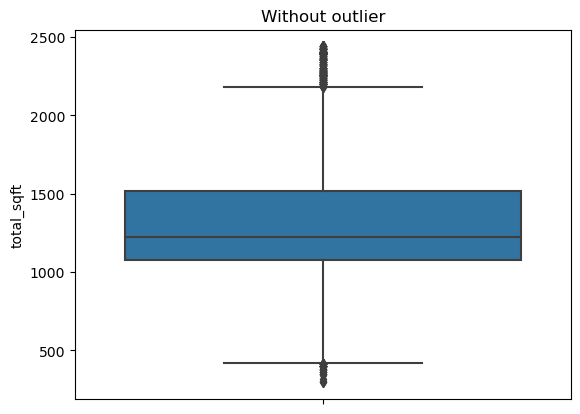

In [107]:
# for total_sqft
outlier(data_copy)

              area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II     2   
1            Plot  Area  Ready To Move          Chikka Tirupathi     4   

   total_sqft  bath  balcony   price  
0      1056.0   2.0      1.0   39.07  
1      2600.0   5.0      3.0  120.00  

Select the column from the dataset.
bath

Q1 = 2.0

Q3 = 3.0

IQR = 1.0

upperference = 4.5

lowerference = 0.5



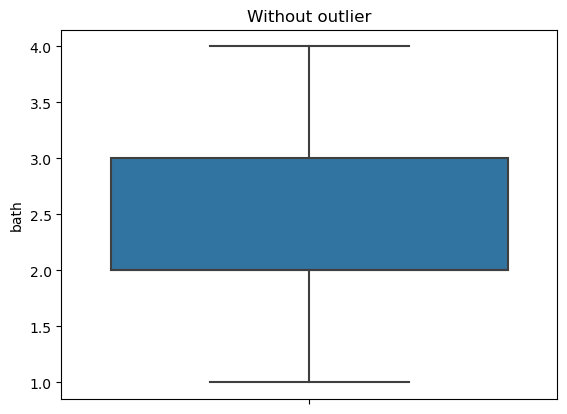

In [109]:
# for bath
outlier(data_copy)

              area_type   availability                  location  size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II     2   
1            Plot  Area  Ready To Move          Chikka Tirupathi     4   

   total_sqft  bath  balcony   price  
0      1056.0   2.0      1.0   39.07  
1      2600.0   5.0      3.0  120.00  

Select the column from the dataset.
price

Q1 = 49.040000000000006

Q3 = 115.0

IQR = 65.96

upperference = 213.94

lowerference = -49.89999999999999



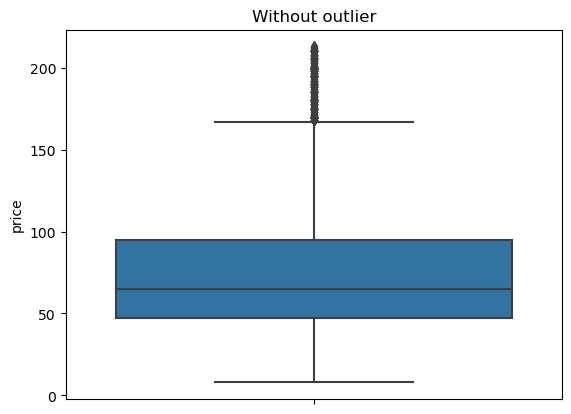

In [110]:
# for price
outlier(data_copy)

* With the help of these method we are able to remove the outliers of size,bath column.

### we have to try another method like log transformation, imputation method. to remove the outliers from the total_sqft and price column.